In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Testes

In [ ]:
pip install easyocr opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 22.6 MB/s eta 0:00:00


Texto bruto encontrado: ['0A', 'SIL', 'QXY', '5081', 'BR']

ETAPA 2: Texto após montagem: 'QXY5081'
CORREÇÃO APLICADA: De 'QXY5081' para 'QXY5D81'

ETAPA 3 SUCESSO: Placa encontrada: 'QXY5D81'


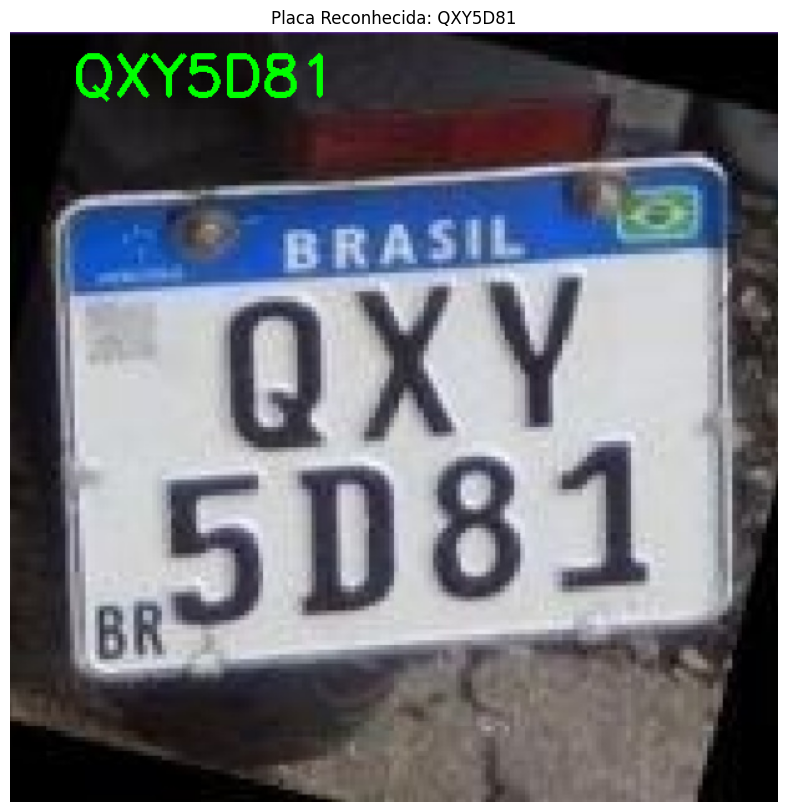

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import re
import numpy as np

caminho_imagem = '/content/drive/MyDrive/challenge_mottu_placas2025/imagens/placa_moto11.jpg'

char_list = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
reader = easyocr.Reader(['pt'], gpu=False)

imagem = cv2.imread(caminho_imagem)
img_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

blockSize = 75
C = 10

img_processada = cv2.adaptiveThreshold(
    img_cinza, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    blockSize,
    C
)

resultado = reader.readtext(img_processada, paragraph=False, allowlist=char_list, detail=1)
placa_encontrada = ""

if resultado:
    textos_brutos = [res[1] for res in resultado]
    print("Texto bruto encontrado:", textos_brutos)

    # --- LÓGICA DE MONTAGEM PRECISA (DA VERSÃO 1) ---
    parte_letras = ''
    parte_numeros_misto = ''

    for texto in textos_brutos:
        if re.fullmatch(r'[A-Z]{3}', texto):
            parte_letras = texto
        elif len(texto) == 4:
            parte_numeros_misto = texto

    texto_placa = parte_letras + parte_numeros_misto
    print(f"\nETAPA 2: Texto após montagem: '{texto_placa}'")

    # --- LÓGICA DE CORREÇÃO COMPLETA (DA VERSÃO 2) ---
    if len(texto_placa) == 7:
        placa_lista = list(texto_placa)
        for i in [0, 1, 2, 4]:
            if placa_lista[i].isdigit():
                if placa_lista[i] == '0': placa_lista[i] = 'D'
                if placa_lista[i] == '1': placa_lista[i] = 'I'
                if placa_lista[i] == '5': placa_lista[i] = 'S'
                if placa_lista[i] == '4': placa_lista[i] = 'H'
        for i in [3, 5, 6]:
            if placa_lista[i].isalpha():
                if placa_lista[i] == 'D': placa_lista[i] = '0'
                if placa_lista[i] == 'I': placa_lista[i] = '1'
                if placa_lista[i] == 'S': placa_lista[i] = '5'

        texto_corrigido = "".join(placa_lista)
        if texto_corrigido != texto_placa:
            print(f"CORREÇÃO APLICADA: De '{texto_placa}' para '{texto_corrigido}'")
            texto_placa = texto_corrigido

    # --- VALIDAÇÃO FINAL ---
    padrao_placa = re.search(r'[A-Z]{3}[0-9][A-Z][0-9]{2}', texto_placa)
    if padrao_placa:
        placa_encontrada = padrao_placa.group(0)
        print(f"\nETAPA 3 SUCESSO: Placa encontrada: '{placa_encontrada}'")
    else:
        print("\nETAPA 3 FALHOU: O texto não corresponde ao padrão da placa.")

# Exibição
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.axis('off')
if placa_encontrada:
    plt.title(f"Placa Reconhecida: {placa_encontrada}")
    imagem_final = imagem.copy()
    cv2.putText(imagem_final, placa_encontrada, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(imagem_final, cv2.COLOR_BGR2RGB))
else:
    plt.title("Nenhuma placa reconhecida")
plt.show()

# Explicação
Este notebook realiza o reconhecimento óptico de caracteres (OCR) em imagens de placas de motos utilizando a biblioteca `easyocr`.

**Passos executados:**

1.  **Montagem do Google Drive:** A primeira célula monta o Google Drive para acessar arquivos armazenados na nuvem.
2.  **Instalação de bibliotecas:** A segunda célula instala as bibliotecas necessárias: `easyocr` para o reconhecimento de texto e `opencv-python` para processamento de imagem.
3.  **Processamento e Reconhecimento:** A terceira célula carrega uma imagem, a processa para melhorar o contraste e nitidez, e utiliza o `easyocr` para extrair o texto.
    *   Define uma lista de caracteres permitidos (`char_list`) para focar no reconhecimento de letras e números de placas.
    *   Aplica um filtro adaptativo (`cv2.adaptiveThreshold`) para binarizar a imagem, tornando o texto mais distinto do fundo.
    *   Lê o texto da imagem processada usando `easyocr`.
    *   Implementa lógica para montar a placa a partir dos textos brutos encontrados, separando letras e números.
    *   Inclui uma lógica de correção para substituir caracteres que podem ser confundidos (como '0' e 'D', '1' e 'I', '5' e 'S').
    *   Valida o texto final encontrado contra um padrão de placa Mercosul (`[A-Z]{3}[0-9][A-Z][0-9]{2}`).
4.  **Exibição do Resultado:** A célula final exibe a imagem original e o texto da placa reconhecida, se encontrada.

Em resumo, o notebook lê uma imagem de placa de veículo, processa essa imagem para otimizar o reconhecimento de texto e extrai a placa, aplicando correções e validações para garantir a precisão.